# **Obtención y preparación de datos**

# OD13. Edición de Estructuras en Pandas

## <font color='blue'>**Modificación de elementos en una Serie**</font>

Podemos modificar un valor de una serie usando la notación corchetes, y haciendo referencia a índices o a las etiquetas.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
s = pd.Series([1, 2, 3, 4, 5], index = ["a", "b", "c", "d", "e"])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [ ]:
s[0] = -1
s["b"] = -2
s

a   -1
b   -2
c    3
d    4
e    5
dtype: int64

Podemos asignar un valor a un rango, definido por índices o por etiquetas, asignando el valor a cada uno de los elementos involucrados en el rango.

In [ ]:
s[1:3] = 0
s

a   -1
b    0
c    0
d    4
e    5
dtype: int64

In [ ]:
s["b":"d"] = -2
s

a   -1
b   -2
c   -2
d   -2
e    5
dtype: int64

Si el rango está delimitado por números (haciendo referencia a la posición de los elementos), el último elemento del rango no se incluye. Por el contrario, si está delimitado por etiquetas, el último elemento sí se incluye.

Al rango podemos asignar también una lista de valores, aunque en este caso la lista deberá tener el mismo número de elementos que el rango en cuestión.

In [ ]:
s[1:3] = [0, 1]
s

a   -1
b    0
c    1
d   -2
e    5
dtype: int64

In [ ]:
s["b":"d"] = [10, 11, 12]
s

a    -1
b    10
c    11
d    12
e     5
dtype: int64

Si asignamos un valor haciendo referencia a una etiqueta que no existe en el índice, se añade dicha etiqueta al índice y se le asigna el valor.

In [ ]:
s["f"] = 0
s

a    -1
b    10
c    11
d    12
e     5
f     0
dtype: int64

Esto solo funciona con etiquetas. Si utilizamos un índice y éste no existe en
la serie, se devolverá un error.

In [ ]:
try:
    s[6] = 11
except Exception as e:
    print(type(e).__doc__)

Sequence index out of range.


Si usamos un rango con etiquetas y alguna de las etiquetas no existe, solo se asigna el valor a las existentes.

In [ ]:
s["f":"h"] = -1
s

a    -1
b    10
c    11
d    12
e     5
f    -1
dtype: int64

Por último, también podemos usar en la selección una lista -tanto de índices como de etiquetas-, en cuyo caso se seleccionan los valores indicados en el orden indicado. Por ejemplo, podemos usar la lista ["c", "a"] para asignar a los elementos correspondientes los valores 1 y 2, respectivamente.

In [ ]:
s[["c", "a"]] = [1, 2]
s

a     2
b    10
c     1
d    12
e     5
f    -1
dtype: int64

In [ ]:
s[[1, 0]] = [20, 21]
s

a    21
b    20
c     1
d    12
e     5
f    -1
dtype: int64

## <font color='blue'>**Eliminación de elementos en una Serie**</font>

El método `pandas.Series.drop` devuelve una copia de la serie tras eliminar el elemento cuya etiqueta se especifica como argumento.

In [ ]:
s = pd.Series([1, 2, 3, 4, 5], index = ["a", "b", "c", "d", "e"])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [ ]:
r = s.drop("a")
r

b    2
c    3
d    4
e    5
dtype: int64

In [ ]:
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

En este ejemplo se ha pasado como único argumento la etiqueta del elemento a eliminar, y el método ha devuelto la serie sin dicho elemento. Si la etiqueta no se encontrase en la serie, se devolvería un error.

También se puede pasar como argumento no una etiqueta, sino una lista de etiquetas. En este caso se eliminarán todos los elementos con dichas etiquetas.

In [ ]:
r = s.drop(["d", "a"])
r

b    2
c    3
e    5
dtype: int64

Las etiquetas no tienen que estar en orden.

El argumento `inplace = True` realiza la eliminación inplace (modificando directamente la serie).

In [ ]:
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

Este método exige el uso de etiquetas para seleccionar los elementos a eliminar. Esto significa que si en un momento dado necesitamos eliminar uno o más elementos por su índice, deberemos convertirlos en sus correspondientes etiquetas, lo que resulta extremadamente sencillo seleccionando los elementos adecuados del index.

In [ ]:
s = pd.Series([1, 2, 3, 4, 5])
s

0    1
1    2
2    3
3    4
4    5
dtype: int64

Si se desea eliminar los elementos cuyos índices son 1 y 3, basta utilizar el atributo `index` para que devuelve todas las etiquetas.

In [ ]:
s = pd.Series([1, 2, 3, 4, 5], index = ["a", "b", "c", "d", "e"])

list(s.index[[1, 3]])

['b', 'd']

In [ ]:
s.drop(s.index[[1, 3]])

a    1
c    3
e    5
dtype: int64

Otra forma para eliminar un elemento de una serie es el método `pandas.Series.pop`. Al igual que con el método `drop`, éste solo acepta una etiqueta y devuelve el valor correspondiente a dicha etiqueta, eliminándolo de la serie in-place.

In [ ]:
s = pd.Series([1, 2, 3, 4, 5])
s

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [ ]:
s.pop(1)

2

In [ ]:
s

0    1
2    3
3    4
4    5
dtype: int64

Si la etiqueta no se encuentra en el index, el método devolverá un error.

## <font color='blue'>**Método `where` en series**</font>

El método `pandas.Series.where` permite filtrar los valores de una serie de forma que solo los que cumplan cierta condición se mantengan. Los valores que no la cumplan son sustituidos por un valor (`NaN` por defecto).

In [ ]:
s = pd.Series(np.arange(0,10))
s

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

Por ejemplo, filtrar los elementos de $s$ que sean pares.

In [ ]:
s.where(s % 2 == 0)

0    0.0
1    NaN
2    2.0
3    NaN
4    4.0
5    NaN
6    6.0
7    NaN
8    8.0
9    NaN
dtype: float64

Los valores que no cumplen la condición son sustituidos por `NaN`. Es posible modificar este valor de reemplazo pasando al método como segundo argumento el valor que se quiere fijar.

In [ ]:
s.where(s % 2 == 0, -1)

0    0
1   -1
2    2
3   -1
4    4
5   -1
6    6
7   -1
8    8
9   -1
dtype: int64

## <font color='blue'>**Modificación de Dataframes**</font>

Existe una gran variedad de formas para seleccionar elementos o bloques de elementos de un dataframe, y cada una de estas selecciones puede ser utilizada para modificar los valores contenidos en el dataframe.

Podemos modificar un valor concreto usando los métodos `loc` o `iloc`, en función de que queramos usar sus etiquetas o índices.



In [ ]:
df = pd.DataFrame(np.arange(12).reshape([4, 3]),
                  index = ["a", "b", "c", "d"],
                  columns = ["A", "B", "C"])
df

,A,B,C
a,0,1,2
b,3,4,5
c,6,7,8
d,9,10,11


In [ ]:
df.iloc[1, 2] = -1
df

,A,B,C
a,0,1,2
b,3,4,-1
c,6,7,8
d,9,10,11


Es posible modificar una columna completa seleccionándola y asignándole, por ejemplo, una lista con los nuevos valores.

In [ ]:
df = pd.DataFrame(np.arange(12).reshape([4, 3]),
                  index = ["a", "b", "c", "d"],
                  columns = ["A", "B", "C"])
df["A"] = -1
df

,A,B,C
a,-1,1,2
b,-1,4,5
c,-1,7,8
d,-1,10,11


En este caso, la longitud de la lista conteniendo los valores a insertar deberá coincidir con la longitud de la columna, salvo que en lugar de una lista se esté asignando un único valor, en cuyo caso se propagará a toda la columna.

Si la selección es un bloque de datos de un tamaño arbitrario, nos encontramos en el mismo escenario: o bien insertamos datos con el mismo tamaño que la selección, o insertamos un único valor que se propagará a toda la selección.

In [ ]:
df = pd.DataFrame(np.arange(12).reshape([4, 3]),
                  index = ["a", "b", "c", "d"],
                  columns = ["A", "B", "C"])
df.loc["b":"c", "A":"B"] = [[-1, -2], [-3, -4]]
df

,A,B,C
a,0,1,2
b,-1,-2,5
c,-3,-4,8
d,9,10,11


In [ ]:
df = pd.DataFrame(np.arange(12).reshape([4, 3]),
                  index = ["a", "b", "c", "d"],
                  columns = ["A", "B", "C"])
df.loc["b":"c", "A":"B"] = -1
df

,A,B,C
a,0,1,2
b,-1,-1,5
c,-1,-1,8
d,9,10,11


También es posible insertar datos en una columna o fila inexistente, en cuyo caso se crea y se le asignan los valores en cuestión.

In [ ]:
df = pd.DataFrame(np.arange(12).reshape([4, 3]),
                  index = ["a", "b", "c", "d"],
                  columns = ["A", "B", "C"])
df["D"] = [10, 20, 30, 40]
df

,A,B,C,D
a,0,1,2,10
b,3,4,5,20
c,6,7,8,30
d,9,10,11,40


In [ ]:
df = pd.DataFrame(np.arange(12).reshape([4, 3]),
                  index = ["a", "b", "c", "d"],
                  columns = ["A", "B", "C"])
df.loc["e"] = [10, 20, 30]
df

,A,B,C
a,0,1,2
b,3,4,5
c,6,7,8
d,9,10,11
e,10,20,30


## <font color='blue'>**Método `where` en dataframes**</font>

De forma semejante a las series, el método de los dataframes `where` filtra los valores contenidos en el dataframe de forma que solo los que cumplan cierta condición se mantengan. El resto de valores son sustituidos por un valor que, por defecto, es `NaN`.

In [ ]:
df = pd.DataFrame(np.arange(12).reshape(-1, 3), columns = ["A", "B", "C"])
df

,A,B,C
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11


Filtrar los valores múltiplos de 2:

In [ ]:
df.where(df % 2 == 0)

,A,B,C
0,0.0,NaN,2.0
1,NaN,4.0,NaN
2,6.0,NaN,8.0
3,NaN,10.0,NaN


Todos aquellos valores que no son múltiplo de 2 son sustituidos por `NaN`. Si, por ejemplo, quisiéramos cambiar de signo a los valores que no cumplen la condición impuesta, lo haríamos así:

In [ ]:
df.where(df % 2 == 0, -df)

,A,B,C
0,0,-1,2
1,-3,4,-5
2,6,-7,8
3,-9,10,-11


## <font color='blue'>**Eliminación de elementos en un dataframe**</font>

El método `pandas.DataFrame.drop` elimina las filas o columnas indicadas y devuelve el resultado, permitiéndose diferentes criterios para especificarlas.

El primer criterio consiste en indicar la lista de etiquetas a eliminar y el eje al que pertenecen.

In [ ]:
df = pd.DataFrame(np.arange(16).reshape([4, 4]),
                  index = ["a", "b", "c", "d"],
                  columns = ["A", "B", "C", "D"])
df

,A,B,C,D
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11
d,12,13,14,15


Eliminar las filas cuyas etiquetas son "a" y "c".

In [ ]:
df.drop(["a", "c"], axis = 0)

,A,B,C,D
b,4,5,6,7
d,12,13,14,15


In [ ]:
df.drop(["a", "c"])

,A,B,C,D
b,4,5,6,7
d,12,13,14,15


Obsérvese que lo que se muestra es el resultado de eliminar las filas indicadas del dataframe. Éste no se modifica salvo que utilicemos el argumento `inplace = True`.

Para eliminar columnas, habría que indicar el eje correspondiente.

In [ ]:
df.drop(["B", "D"], axis = 1)

,A,C
a,0,2
b,4,6
c,8,10
d,12,14


Si no especificamos el `axis=1` para que se eliminen las columnas, nos dará un error.

In [ ]:
try:
    df.drop(["B", "D"])
except Exception as e:
    print(type(e).__doc__)

Mapping key not found.


Otra alternativa para especificar si se están eliminando filas o columnas es utilizar directamente los parámetros `index` y `columns`. Así, otra forma de eliminar las filas $a$ y $c$ sería la siguiente:



In [ ]:
df.drop(index = ["a", "c"])

,A,B,C,D
b,4,5,6,7
d,12,13,14,15


In [ ]:
df.drop(columns = ["B", "D"])

,A,C
a,0,2
b,4,6
c,8,10
d,12,14


### <font color='green'>Actividad 1</font>

En la Liga del Diplomado juegan 6 equipos: Equipo A, Equipo B, Equipo C, Equipo D, Equipo E y el **Equipo de Profes** (Campeón invicto en todas las ediciones del Diplomado).

La imagen muestra la tabla resumen con los resultados de la liga el último año.
<br><br>
<img src='https://drive.google.com/uc?export=view&id=1xW3fW4RrTim0N6hGjT51QxBOW-e36if8' width="800" align="center" style="margin-right: 20px">
<br><br>
1. Generar el dataframe __tabla_posiciones__ con la información de la tabla anterior.
2. Determinar para cada equipo la diferencia de goles (goles a favor -  goles en contra) y agregar esta información al dataframe.
3. Determinar la posición de cada equipo en la liga y presentar la información ordenada.
4. Durante la confrontación entre el Equipo A y el **Equipo de Profes** que fue ganada por A. El equipo A tenía más jugadores en cancha que los reglamentarios (tramposos!!!), por lo que la comisión disciplinaria decidió: i) descontar los puntos al equipo A y entregarlos (justamente) al **Equipo de Profes**, ii) finalizar el partido por un marcador de 3-0 a favor de los profes. Realice las ediciones correspondientes en el dataframe y entregue la tabla de posiciones final.
5. El premio al fair play se entrega al equipo con mejor comportamiento, para ello, se deben sumar las tarjetas acumuladas (tanto amarillas como rojas) en donde a las tarjetas rojas se les aplica un castigo multiplicándolas por 2, en caso de empate se selecciona al con menor número de tarjetas rojas, si se mantiene el empate el premio es para el equipo con menor número de tarjetas totales. Cree las columnas fair play con el indicador descrito y la columna tarjetas totales y determine el ganador del premio.
6. El último lugar de la tabla desciende de la liga y por lo tanto debe ser eliminado del dataframe.


In [ ]:
# Tu código aquí ...

# 1. Generar el dataframe tabla_posiciones con la información de la tabla anterior.
data = {
    'Equipo': ['Equipo A', 'Equipo B', 'Equipo Profes', 'Equipo C', 'Equipo D', 'Equipo E'],
    'Puntos': [30, 25, 27, 17, 19, 23],
    'Goles_a_favor': [65, 45, 60, 30, 25, 45],
    'Goles_en_contra':[10, 15, 20, 60, 30, 20],
    'Tarj_Amarillas':[7, 2, 4, 4, 9, 4],
    'Tarj_Rojas':[3, 2, 2, 4, 5, 1]
    }
tabla_posiciones = pd.DataFrame(data)
tabla_posiciones

,Equipo,Puntos,Goles_a_favor,Goles_en_contra,Tarj_Amarillas,Tarj_Rojas
0,Equipo A,30,65,10,7,3
1,Equipo B,25,45,15,2,2
2,Equipo Profes,27,60,20,4,2
3,Equipo C,17,30,60,4,4
4,Equipo D,19,25,30,9,5
5,Equipo E,23,45,20,4,1


In [ ]:
# 2. Determinar para cada equipo la diferencia de goles (goles a favor - goles en contra) y agregar esta información al dataframe.

def calcular_diferencia_de_goles(tabla):
    tabla['Difer_goles'] = tabla['Goles_a_favor'] - tabla['Goles_en_contra']
    return tabla

tabla_posiciones_actualizada = calcular_diferencia_de_goles(tabla_posiciones)
tabla_posiciones_actualizada


,Equipo,Puntos,Goles_a_favor,Goles_en_contra,Tarj_Amarillas,Tarj_Rojas,Difer_goles
0,Equipo A,30,65,10,7,3,55
1,Equipo B,25,45,15,2,2,30
2,Equipo Profes,27,60,20,4,2,40
3,Equipo C,17,30,60,4,4,-30
4,Equipo D,19,25,30,9,5,-5
5,Equipo E,23,45,20,4,1,25


In [ ]:
# 3. Determinar la posición de cada equipo en la liga y presentar la información ordenada.

def ordenar_y_enumarar_tabla(tabla):
    tabla_ordenada = tabla.sort_values(by='Puntos', ascending=False)  #ordenar la tabla por pts
    tabla_ordenada = tabla_ordenada.reset_index(drop=True)
    tabla_ordenada.index += 1                                         #las posiciones de la tabla
    tabla_ordenada.index.name = 'Posición'                            #ponerle nombre al index
    return tabla_ordenada

tabla_ordenadas = ordenar_y_enumarar_tabla(tabla_posiciones)
tabla_ordenadas


,Equipo,Puntos,Goles_a_favor,Goles_en_contra,Tarj_Amarillas,Tarj_Rojas,Difer_goles
Posición,,,,,,,
1,Equipo A,30,65,10,7,3,55
2,Equipo Profes,27,60,20,4,2,40
3,Equipo B,25,45,15,2,2,30
4,Equipo E,23,45,20,4,1,25
5,Equipo D,19,25,30,9,5,-5
6,Equipo C,17,30,60,4,4,-30


In [ ]:
# 4. Durante la confrontación entre el Equipo A y el Equipo de Profes que fue ganada por A.
#    El equipo A tenía más jugadores en cancha que los reglamentarios (tramposos!!!), por lo que la comisión disciplinaria decidió:
#    i) descontar los puntos al equipo A y entregarlos (justamente) al Equipo de Profes,
#    ii) finalizar el partido por un marcador de 3-0 a favor de los profes.
#    Realice las ediciones correspondientes en el dataframe y entregue la tabla de posiciones final.

tabla_ordenadas.loc[tabla_ordenadas['Equipo'] == 'Equipo A', 'Puntos'] -= 3                # restarle 3 pts al equipo A
tabla_ordenadas.loc[tabla_ordenadas['Equipo'] == 'Equipo A', 'Goles_en_contra'] += 3       # 3 goles en contra al equipo A
tabla_ordenadas.loc[tabla_ordenadas['Equipo'] == 'Equipo Profes', 'Puntos'] += 3           # sumarle 3 pts al equipo de profes
tabla_ordenadas.loc[tabla_ordenadas['Equipo'] == 'Equipo Profes', 'Goles_a_favor'] += 3    # 3 a favor al equipo de profes

tabla_posiciones_2 = calcular_diferencia_de_goles(tabla_ordenadas) # generar la diferencia de goles
tabla_ordenadas_2 = ordenar_y_enumarar_tabla(tabla_posiciones_2)   # ordenar la tabla
tabla_ordenadas_2

,Equipo,Puntos,Goles_a_favor,Goles_en_contra,Tarj_Amarillas,Tarj_Rojas,Difer_goles
Posición,,,,,,,
1,Equipo Profes,30,63,20,4,2,43
2,Equipo A,27,65,13,7,3,52
3,Equipo B,25,45,15,2,2,30
4,Equipo E,23,45,20,4,1,25
5,Equipo D,19,25,30,9,5,-5
6,Equipo C,17,30,60,4,4,-30


In [ ]:
# 5. El premio al fair play se entrega al equipo con mejor comportamiento, para ello, se deben sumar las tarjetas acumuladas
#    (tanto amarillas como rojas) en donde a las tarjetas rojas se les aplica un castigo multiplicándolas por 2, en caso de empate
#    se selecciona al con menor número de tarjetas rojas, si se mantiene el empate el premio es para el equipo con menor número de tarjetas totales.
#    Cree las columnas fair play con el indicador descrito y la columna tarjetas totales y determine el ganador del premio.

tabla_ordenadas_2['Fair_Play'] = tabla_ordenadas_2['Tarj_Amarillas'] + tabla_ordenadas_2['Tarj_Rojas']*2
tabla_ordenadas_2['Tarj_Totales'] = tabla_ordenadas_2['Tarj_Amarillas'] + tabla_ordenadas_2['Tarj_Rojas']
tabla_ordenadas_2

,Equipo,Puntos,Goles_a_favor,Goles_en_contra,Tarj_Amarillas,Tarj_Rojas,Difer_goles,Fair_Play,Tarj_Totales
Posición,,,,,,,,,
1,Equipo Profes,30,63,20,4,2,43,8,6
2,Equipo A,27,65,13,7,3,52,13,10
3,Equipo B,25,45,15,2,2,30,6,4
4,Equipo E,23,45,20,4,1,25,6,5
5,Equipo D,19,25,30,9,5,-5,19,14
6,Equipo C,17,30,60,4,4,-30,12,8


In [ ]:
# Buscar al ganador del FAIR PLAY

min_suma_tarjetas = tabla_ordenadas_2['Fair_Play'].min()
equipos_con_min_suma_tarjetas = tabla_ordenadas_2[tabla_ordenadas_2['Fair_Play'] == min_suma_tarjetas]

if len(equipos_con_min_suma_tarjetas) > 1:
    equipos_con_min_suma_tarjetas = equipos_con_min_suma_tarjetas.sort_values('Tarj_Rojas')

equipo_seleccionado = equipos_con_min_suma_tarjetas.iloc[0]
print(f"El equipo ganador del Fair Play, es el {equipo_seleccionado['Equipo']}")

El equipo ganador del Fair Play, es el Equipo E


In [ ]:
# 6. El último lugar de la tabla desciende de la liga y por lo tanto debe ser eliminado del dataframe.

tabla_ordenadas_2.drop(tabla_ordenadas_2.index[-1])

,Equipo,Puntos,Goles_a_favor,Goles_en_contra,Tarj_Amarillas,Tarj_Rojas,Difer_goles,Fair_Play,Tarj_Totales
Posición,,,,,,,,,
1,Equipo Profes,30,63,20,4,2,43,8,6
2,Equipo A,27,65,13,7,3,52,13,10
3,Equipo B,25,45,15,2,2,30,6,4
4,Equipo E,23,45,20,4,1,25,6,5
5,Equipo D,19,25,30,9,5,-5,19,14


<font color='green'>Fin Actividad 1</font>

### <font color='green'>Actividad 2</font>

Dado un DataFrame con registros de ventas y retornos de productos, debes calcular la tasa de retorno y almacenarla en una Serie.

```
dates = pd.date_range('20230101', periods=10)
df1 = pd.DataFrame({
    'sales': np.random.randint(50, 200, len(dates)),
    'returns': np.random.randint(1, 20, len(dates))
}, index=dates)
```

1. Calcula la tasa de retorno como returns / sales.
2. Almacena el resultado en una Serie con el mismo índice de fechas.
3. Une esta Serie al DataFrame original como una nueva columna llamada 'return_rate'.


In [ ]:
# Tu código aquí ...

#semilla
np.random.seed(1)

dates = pd.date_range('20230101', periods=10)
df1 = pd.DataFrame({
    'sales': np.random.randint(50, 200, len(dates)),
    'returns': np.random.randint(1, 20, len(dates))
}, index=dates)

serie = pd.Series(df1['returns']/df1['sales'])
print(serie)

print()

df1['return_rate'] = serie
df1

2023-01-01    0.218391
2023-01-02    0.031579
2023-01-03    0.155738
2023-01-04    0.064171
2023-01-05    0.060109
2023-01-06    0.116279
2023-01-07    0.097938
2023-01-08    0.027933
2023-01-09    0.082645
2023-01-10    0.097826
Freq: D, dtype: float64



,sales,returns,return_rate
2023-01-01,87,19,0.218391
2023-01-02,190,6,0.031579
2023-01-03,122,19,0.155738
2023-01-04,187,12,0.064171
2023-01-05,183,11,0.060109
2023-01-06,129,15,0.116279
2023-01-07,194,19,0.097938
2023-01-08,179,5,0.027933
2023-01-09,121,10,0.082645
2023-01-10,184,18,0.097826


## <font color='purple'> __EXPERIMENTO__: </font>


Para el df resultante del ejercicio anterior, se realizara una 'visualización de datos' y 'Segmentación de datos'

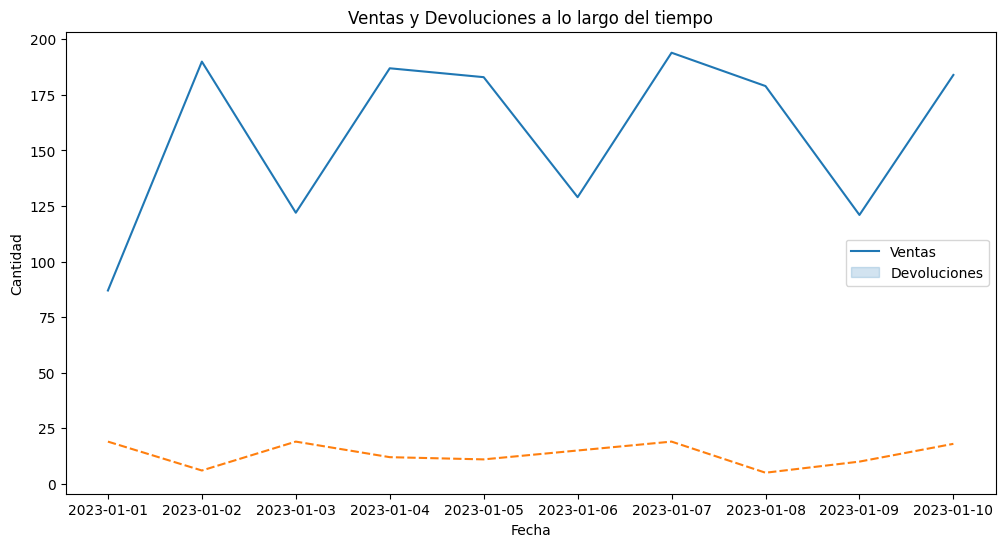

In [ ]:
# visualización de datos

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=df1[['sales', 'returns']])
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.legend(['Ventas', 'Devoluciones'])
plt.title('Ventas y Devoluciones a lo largo del tiempo')
plt.show()

In [ ]:
# Segmentación de datos

bins = [50, 100, 150, 200]
labels = ['Bajo', 'Medio', 'Alto']
df1['Rango_Precios'] = pd.cut(df1['sales'], bins=bins, labels=labels)
sales_segments = df1.groupby('Rango_Precios').mean()
print(sales_segments)

                    sales    returns  return_rate
Rango_Precios                                    
Bajo            87.000000  19.000000     0.218391
Medio          124.000000  14.666667     0.118220
Alto           186.166667  11.833333     0.063259


<ipython-input-10-a5eb62292d6c>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_segments = df1.groupby('Rango_Precios').mean()


In [ ]:
# FIN EXPERIMENTO

<font color='purple'>Fin experimento </font>

<font color='green'>Fin Actividad 2</font>

### <font color='green'>Actividad 3</font>

Tienes un DataFrame de precios de acciones y una Serie que representa el volumen de acciones negociadas. Algunos días, el volumen es desconocido y aparece como NaN en la Serie. Tu objetivo es llenar estos valores, pero no con un método simple.

```
dates = pd.date_range('20230101', periods=8)
df2 = pd.DataFrame({
    'price': np.random.randn(len(dates)).cumsum() + 50
}, index=dates)

volume = pd.Series(np.where(np.random.choice([True, False], len(dates)), np.random.randint(1000, 5000, len(dates)), np.nan), index=dates)
```

1. En los días con volumen faltante, llena el valor con el volumen del día anterior si el precio de la acción ha aumentado, o con el volumen del día siguiente si el precio ha disminuido.
2. Añade la Serie de volumen al DataFrame como una nueva columna.


In [ ]:
# Tu código aquí ...

#semilla
np.random.seed(1)

dates = pd.date_range('20230101', periods=8)
df2 = pd.DataFrame({
    'price': np.random.randn(len(dates)).cumsum() + 50
}, index=dates)

volume = pd.Series(np.where(np.random.choice([True, False], len(dates)), np.random.randint(1000, 5000, len(dates)), np.nan), index=dates)

# Llenar los valores faltantes en la serie volume basados en el precio
for i in range(1, len(volume) - 1):
    if pd.isna(volume.iloc[i]):
        if df2['price'].iloc[i] > df2['price'].iloc[i - 1]:
            volume.iloc[i] = volume.iloc[i - 1]
        else:
            volume.iloc[i] = volume.iloc[i + 1]

# Llenar el primer valor faltante (si lo hay) con el siguiente valor
if pd.isna(volume.iloc[0]):
    volume.iloc[0] = volume.iloc[1]

# Llenar el último valor faltante (si lo hay) con el valor anterior
if pd.isna(volume.iloc[-1]):
    volume.iloc[-1] = volume.iloc[-2]

df2['Volume'] = volume

print(volume)
print()
print(df2)

2023-01-01    4049.0
2023-01-02    4049.0
2023-01-03    1753.0
2023-01-04    2527.0
2023-01-05    2527.0
2023-01-06    2888.0
2023-01-07    2110.0
2023-01-08    3189.0
Freq: D, dtype: float64

                price  Volume
2023-01-01  51.624345  4049.0
2023-01-02  51.012589  4049.0
2023-01-03  50.484417  1753.0
2023-01-04  49.411449  2527.0
2023-01-05  50.276856  2527.0
2023-01-06  47.975318  2888.0
2023-01-07  49.720129  2110.0
2023-01-08  48.958922  3189.0


<font color='green'>Fin Actividad 3</font>

### <font color='green'>Actividad 4</font>

Tienes un DataFrame con información de ventas y gastos por departamento. Se te pide extraer ciertos departamentos y realizar una transformación en los datos.

```
departments = ["HR", "Sales", "Tech", "Admin", "Finance"]
df3 = pd.DataFrame({
    'sales': np.random.randint(10, 100, len(departments)),
    'expenses': np.random.randint(10, 50, len(departments))
}, index=departments)
```

1. Extrae sólo los departamentos "Sales" y "Tech".
2. Crea una Serie que represente el margen de beneficio (definido como sales - expenses).
3. Combina esta Serie con el subconjunto del DataFrame original utilizando pd.concat.


In [ ]:
# Tu código aquí ...

#semilla
np.random.seed(1)

departments = ["HR", "Sales", "Tech", "Admin", "Finance"]
df3 = pd.DataFrame({
    'sales': np.random.randint(10, 100, len(departments)),
    'expenses': np.random.randint(10, 50, len(departments))
}, index=departments)

# 1
print('1.')
print(df3.loc[['Sales', 'Tech']])

# 2
print()
print('2.')
serie_beneficio = pd.Series((df3['sales'] - df3['expenses']), name = 'beneficio')
print(serie_beneficio)

# 3
print()
print('3.')
df3_concat = pd.concat([df3, serie_beneficio], axis=1)
print(df3_concat)

1.
       sales  expenses
Sales     22        25
Tech      82        10

2.
HR         32
Sales      -3
Tech       72
Admin      -7
Finance    74
Name: beneficio, dtype: int64

3.
         sales  expenses  beneficio
HR          47        15         32
Sales       22        25         -3
Tech        82        10         72
Admin       19        26         -7
Finance     85        11         74


<font color='green'>Fin Actividad 4</font>

### <font color='green'>Actividad 5</font>

Estás trabajando con un DataFrame que contiene ventas trimestrales y anuales de diferentes años. Tu objetivo es calcular el promedio de ventas trimestrales para cada año y agregarlo como una nueva entrada en la Serie.

```
years = [2021, 2022, 2023]
entries = ["Q1", "Q2", "Q3", "Q4", "Annual"]
index = pd.MultiIndex.from_product([years, entries], names=["Year", "Entry"])
df4 = pd.DataFrame({
    'sales': np.random.randint(500, 1500, len(index))
}, index=index)
```

1. Calcula el promedio de ventas trimestrales para cada año (no consideres la entrada "Annual").
2. Añade esta información como una nueva entrada llamada "Quarterly_avg" en el DataFrame original.


In [ ]:
# Tu código aquí ...

#semilla
np.random.seed(1)

years = [2021, 2022, 2023]
entries = ["Q1", "Q2", "Q3", "Q4", "Annual"]
index = pd.MultiIndex.from_product([years, entries], names=["Year", "Entry"])
df4 = pd.DataFrame({
    'sales': np.random.randint(500, 1500, len(index))
}, index=index)
print(df4, '\n')

# Filtrar las filas que no son 'Annual' y calcular las sumas trimestrales
ventas_trimestrales = df4[df4.index.get_level_values('Entry') != 'Annual'].groupby(level='Year')['sales'].sum()
ventas_trimestrales.index = pd.MultiIndex.from_tuples([(year, 'Quarterly_avg') for year in ventas_trimestrales.index], names=["Year", "Entry"])

# Concatenar los promedios trimestrales con el DataFrame original
df4 = pd.concat([df4, ventas_trimestrales.to_frame()], axis=0)
print(df4)

             sales
Year Entry        
2021 Q1        537
     Q2        735
     Q3       1408
     Q4        572
     Annual   1267
2022 Q1       1405
     Q2       1215
     Q3       1145
     Q4       1347
     Annual   1460
2023 Q1        644
     Q2        629
     Q3       1472
     Q4       1083
     Annual   1249 

                    sales
Year Entry               
2021 Q1               537
     Q2               735
     Q3              1408
     Q4               572
     Annual          1267
2022 Q1              1405
     Q2              1215
     Q3              1145
     Q4              1347
     Annual          1460
2023 Q1               644
     Q2               629
     Q3              1472
     Q4              1083
     Annual          1249
2021 Quarterly_avg   3252
2022 Quarterly_avg   5112
2023 Quarterly_avg   3828


<font color='green'>Fin Actividad 5</font>